# Comparisons

In this notebook we analyze the proteins in the Johnston, Thurgood, and Mayer papers. First, we extract their total and differential proteins. We also sort the differential proteins into those that are upregulated and those that are downregulated. After we extract their data, we make a venn diagram comparing their differential proteins, and another venn diagram comparing their total proteins. We then do a pathway enrichment on the differential proteins. Finally, we make a venn diagram comparing the total proteins in each paper to the total proteins we found.

In [1]:
johnston_file = "data/134638_0_supp_38937_p0y7zb.xlsx"
mayer_file = "data/133399_0_supp_15943_4ybsvb.xlsx"
thurgood_file = "data/bjh15751-sup-0006-TableS3.xlsx"

## Mayer Paper

Dowload and import supplementary table 3, use after imputation sheets (Mayer et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5795392/bin/supp_RA117.000425_133399_0_supp_15943_4ybsvb.xlsx

I parse the dataframe and extract all the names of identified proteins, all the proteins labeled as significantly upregulated (+ in t-test difference) and downregulated (- in t-test difference), and differential (+ in t-test).
The differential and total proteins identified will be used to generate venn diagrams.
The upregulated and downregulated will be used to generate a functional pathay analysis.
In the paper they found 440 upregulated and 427 downregulated, however, these numbers double-count some proteins. This analysis finds 425 upregulated and 376 downregulated, none are double-counted in this analysis. There are 6, 945 total proteins identified in the paper.

In [2]:
import pandas as pd
import requests
import os.path
import os
from os import path
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

Since this paper differentiated between nuclear and cytoplasmic, we have to read in 2 files. First, we pull the nuclear file and extract the significant, upregulated, and downregulated proteins.

In [3]:
ne_sheet_name = "NE_after imputation"
#The other is "NE_before imputation"
m_ne_df = pd.read_excel(mayer_file, sheet_name = ne_sheet_name)

In [4]:
m_sig_ne = m_ne_df.loc[m_ne_df['Student\'s t-test Significant CLL vs elderly Bcells'] == '+']
m_up_ne = m_sig_ne.loc[m_sig_ne['Student\'s t-test Difference  CLL vs  elderly B cells'] > 0]
m_down_ne = m_sig_ne.loc[m_sig_ne['Student\'s t-test Difference  CLL vs  elderly B cells'] < 0]

Next, we pull the cytoplasmic file and extract the significant, upregulated, and downregulated proteins.

In [5]:
mayer_cyt_sheet_name = "CYT_after imputation"
m_cyt_df = pd.read_excel(mayer_file, sheet_name= mayer_cyt_sheet_name,
                         skiprows = 1) #There is a header saying sup. table s3

In [6]:
m_sig_cyt = m_cyt_df.loc[m_cyt_df['Student\'s t-test Significant CLL vs elderly B cells'] == '+']
m_up_cyt = m_sig_cyt.loc[m_sig_cyt['Student\'s t-test Difference  CLL vs  elderly B cells'] > 0]
m_down_cyt = m_sig_cyt.loc[m_sig_cyt['Student\'s t-test Difference  CLL vs  elderly B cells'] < 0]

In [7]:
m_diff = []

In [8]:
sig_frames = [m_sig_ne, m_sig_cyt]
sig = pd.concat(sig_frames)

In [9]:
for protein in sig['Protein IDs'] :
    temp = protein.split(";")
    m_diff.append(temp[0])

In [10]:
m_upreg = []

In [11]:
up_frames = [m_up_ne, m_up_cyt]
m_u = pd.concat(up_frames)

In [12]:
for protein in m_u['Protein IDs'] :
    temp = protein.split(";")
    m_upreg.append(temp[0])

In [13]:
m_downreg = []

In [14]:
down_frames = [m_down_ne, m_down_cyt]
m_d = pd.concat(down_frames)

In [15]:
for protein in m_d['Protein IDs'] :
    temp = protein.split(";")
    m_downreg.append(temp[0])

The following cells extract all the proteins identified

In [16]:
m_tot = []

In [17]:
frames = [m_ne_df, m_cyt_df]
m_t = pd.concat(frames)

In [18]:
m_t.dropna(subset = ['Protein IDs'], inplace = True)

In [19]:
for protein in m_t['Protein IDs']:
    temp = protein.split(";")
    m_tot.append(temp[0])

Save to a file

In [20]:
#m_diff.to_csv('data/m_diff.csv')
#m_tot.to_csv('data/m_tot.csv')

## Thurgood Paper
Download and import supplementary table 3 (Thurgood et al., 2019)
https://onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1111%2Fbjh.15751&file=bjh15751-sup-0006-TableS3.xlsx

I parse the dataframe and extract all the proteins labeled as significantly upregulated (+) and downregulated (-) and differential. There was no list with all the identified proteins
The differential proteins will be used to generate venn diagrams.
The upregulated and downregulated will be used to generate a functional pathay analysis.
In the paper they found 255 upregulated and 94 downregulated. This analysis finds 257 upregulated and 94 downregulated.

In [21]:
thur_sheet_name = "Total list of proteins"
t_df = pd.read_excel(thurgood_file, sheet_name = thur_sheet_name)

Here I am extracting all the proteins from the file containing differential proteins. I also sort into upregulated and downregulated.

In [22]:
t_upreg = []

In [23]:
t_u = t_df.loc[t_df['CLL vs. NOR_log2_sfc'] > 0]

In [24]:
for protein in t_u['protein']:
    temp = protein.split("|")
    protein_name = temp[1].split("-")[0]
    t_upreg.append(protein_name)

In [25]:
t_downreg = []

In [26]:
t_d = t_df.loc[t_df['CLL vs. NOR_log2_sfc'] < 0]

In [27]:
for protein in t_d['protein']:
    temp = protein.split("|")
    protein_name = temp[1].split("-")[0]
    t_downreg.append(protein_name)

In [28]:
t_diff = []

In [29]:
t_d = t_df['protein']

In [30]:
for protein in t_d:
    temp = protein.split("|")
    protein_name = temp[1].split("-")[0]
    t_diff.append(protein_name)

Save to a file

In [31]:
#t_diff.to_csv('data/t_diff.csv')

## Johnston Paper
Download and import supplementary table 2 (Johnston et al., 2018)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5880099/bin/supp_RA117.000539_134638_0_supp_38937_p0y7zb.xlsx

I parse the dataframe and extract all the names of identified proteins, all the proteins labeled as significantly upregulated (>0.3) and downregulated (<-0.3), and differential.
The differential and total proteins identified will be used to generate venn diagrams.
The upregulated and downregulated will be used to generate a functional pathay analysis.
In the paper they found 544 upregulated and 592 downregulated. This analysis finds 545 upregulated and 592 downregulated.

In [32]:
j_sheet_name = "CLL proteome"
j_df = pd.read_excel(johnston_file, sheet_name = j_sheet_name)

Here I extract all the proteins with a differential regulation score (>0.3 and <-0.3). I sort them into upregulated and downregulated as well as add them to the differential. I also extract the names of all proteins identified.

In [33]:
j_u = j_df.loc[j_df['Regulation score'] >= 0.3]
j_upreg = j_u['Protein group accession']

In [34]:
j_d = j_df.loc[j_df['Regulation score'] <= -0.3]
j_downreg = j_d['Protein group accession']

In [35]:
diff_frames = [j_downreg, j_upreg]
j_diff = pd.concat(diff_frames)

In [36]:
j_tot = j_df['Protein group accession']

Save to a file

In [37]:
#j_diff.to_csv('data/j_diff.csv')
#j_tot.to_csv('data/j_tot.csv')

## Overlap

Here I make venn diagrams looking at the overlaps between the papers

In [38]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3

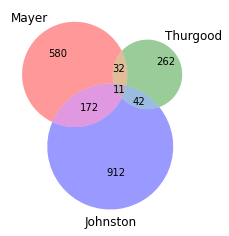

In [39]:
venn3(subsets = (set(m_diff), set(t_diff), set(j_diff)), set_labels = ('Mayer', 'Thurgood', 'Johnston'))
#plt.savefig('data/diff_overlap.png')
plt.show()
# Johnston 1 off (912)

This venn diagram shows the overlap between the differential proteins of each paper

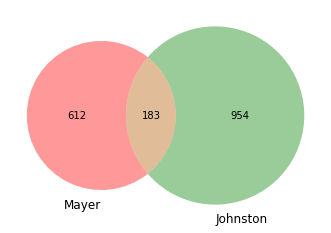

In [40]:
venn2(subsets = (set(m_diff), set(j_diff)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/diff_overlap_2.png')
plt.show()

This is a little messier, but - 

In [41]:
m_and_j = set(m_tot).intersection(set(j_tot))
mj_m_diff = m_and_j.intersection(m_diff)
mj_j_diff = m_and_j.intersection(j_diff)

<function matplotlib.pyplot.show(*args, **kw)>

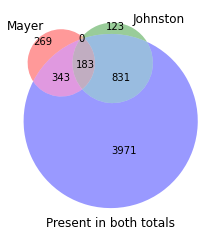

In [42]:
venn3(subsets = (set(m_diff), set(j_diff), m_and_j), set_labels = ('Mayer', 'Johnston',
                                                                   'Present in both totals'))
#plt.savefig('data/diff_overlap_3.png')
plt.show

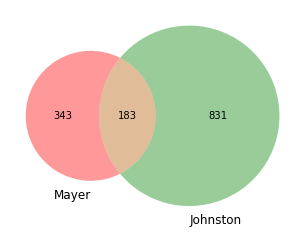

In [43]:
venn2(subsets = (set(mj_m_diff), set(mj_j_diff)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/diff_overlap_4.png')
plt.show()

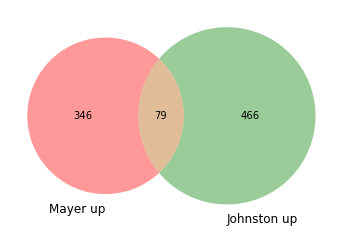

In [44]:
venn2(subsets = (set(m_upreg), set(j_upreg)), set_labels = ('Mayer up', 'Johnston up'))
#plt.savefig('data/diff_overlap_2.png')
plt.show()

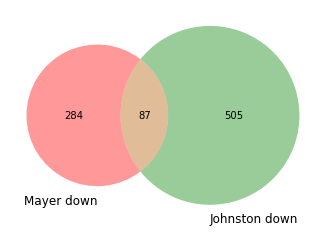

In [45]:
venn2(subsets = (set(m_downreg), set(j_downreg)), set_labels = ('Mayer down', 'Johnston down'))
#plt.savefig('data/diff_overlap_2.png')
plt.show()

I got curious if they were agreeing on whether those differential proteins were up or down regulated, so I decided to venn those subsets. 

In [46]:
data_lists = {
    'Mayer down': pd.Series(m_downreg),
    'Mayer up': pd.Series(m_upreg),
    'Johnston down': pd.Series(j_downreg),
    'Johnston up':pd.Series(j_upreg)
}


In [47]:
index = set(m_downreg).union(set(m_upreg), set(j_downreg), set(j_upreg))
net_data = pd.DataFrame(index=index, columns=['Mayer down', 'Mayer up', 'Johnston down', 'Johnston up'])

for column in net_data:
    for prot in net_data.index:
        if prot in data_lists[column].values:
            net_data[column][prot] = True
        else: net_data[column][prot] = False
net_data.head()

,Mayer down,Mayer up,Johnston down,Johnston up
P40429,False,False,True,False
O43464,False,True,False,False
O15020,False,False,False,True
P06280,False,False,True,False
P48728,True,False,False,False


In [48]:
print(net_data.apply(sum))

Mayer down       371
Mayer up         425
Johnston down    592
Johnston up      545
dtype: int64


C:\Users\carol\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:15: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  warn((
C:\Users\carol\anaconda3\lib\site-packages\venn\_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


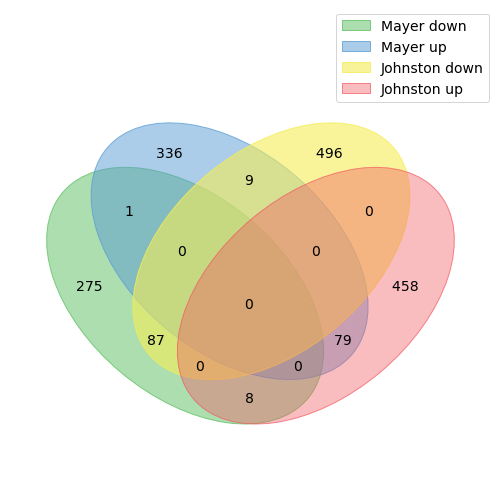

In [49]:
import venn
from numpy import nan
set_cols = {}
for col in net_data:
    set_cols[col] = set(net_data[col].replace(False, nan).dropna().index)


labels = venn.get_labels(set_cols.values(), fill=['number'])
fig, ax = venn.venn4(labels, names=['Mayer down', 'Mayer up', 'Johnston down', 'Johnston up'])
plt.savefig('data/up-down-over.png')
plt.show()

This venn diagram shows the overlap between differential proteins of Mayer and Johnston

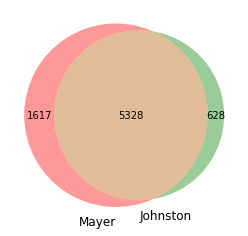

In [50]:
venn2(subsets = (set(m_tot), set(j_tot)), set_labels = ('Mayer', 'Johnston'))
#plt.savefig('data/total_overlap.png')
plt.show()

This venn diagram shows the overlap for the total proteins in Johnston and Mayer. Thurgood doesn't have a list of total proteins

## Pathway Analysis

Here I am doing a functional pathway enrichment. I import GProfiler and run a KEGG analysis on the significantly upregulated and downregulated proteins for each paper.

In [51]:
from gprofiler import GProfiler

In [52]:
gp = GProfiler(return_dataframe = True)

In [53]:
johnston_upregulated_gp = gp.profile(organism='hsapiens', query=list(j_upreg))
johnston_upregulated_gp[johnston_upregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
138,KEGG,KEGG:03040,Spliceosome,2.844661e-22,True,Spliceosome,150,240,37,8001,0.154167,0.246667,query_1,[KEGG:00000]
531,KEGG,KEGG:03015,mRNA surveillance pathway,5.066727e-08,True,mRNA surveillance pathway,98,240,18,8001,0.075000,0.183673,query_1,[KEGG:00000]
547,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",8.919109e-08,True,"Valine, leucine and isoleucine degradation",48,240,13,8001,0.054167,0.270833,query_1,[KEGG:00000]
1052,KEGG,KEGG:03420,Nucleotide excision repair,3.500973e-02,True,Nucleotide excision repair,45,240,7,8001,0.029167,0.155556,query_1,[KEGG:00000]
1054,KEGG,KEGG:04330,Notch signaling pathway,3.516734e-02,True,Notch signaling pathway,59,240,8,8001,0.033333,0.135593,query_1,[KEGG:00000]


In [54]:
johnston_downregulated_gp = gp.profile(organism='hsapiens', query=list(j_downreg))
johnston_downregulated_gp[johnston_downregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
170,KEGG,KEGG:04670,Leukocyte transendothelial migration,0.000014,True,Leukocyte transendothelial migration,114,291,18,8001,0.061856,0.157895,query_1,[KEGG:00000]
203,KEGG,KEGG:04142,Lysosome,0.000082,True,Lysosome,128,291,18,8001,0.061856,0.140625,query_1,[KEGG:00000]
258,KEGG,KEGG:04062,Chemokine signaling pathway,0.000547,True,Chemokine signaling pathway,190,291,21,8001,0.072165,0.110526,query_1,[KEGG:00000]
317,KEGG,KEGG:04015,Rap1 signaling pathway,0.002591,True,Rap1 signaling pathway,210,291,21,8001,0.072165,0.100000,query_1,[KEGG:00000]
339,KEGG,KEGG:04611,Platelet activation,0.004417,True,Platelet activation,124,291,15,8001,0.051546,0.120968,query_1,[KEGG:00000]
350,KEGG,KEGG:04070,Phosphatidylinositol signaling system,0.004918,True,Phosphatidylinositol signaling system,97,291,13,8001,0.044674,0.134021,query_1,[KEGG:00000]
402,KEGG,KEGG:05135,Yersinia infection,0.012922,True,Yersinia infection,136,291,15,8001,0.051546,0.110294,query_1,[KEGG:00000]
404,KEGG,KEGG:04662,B cell receptor signaling pathway,0.013383,True,B cell receptor signaling pathway,79,291,11,8001,0.037801,0.139241,query_1,[KEGG:00000]
466,KEGG,KEGG:05140,Leishmaniasis,0.027774,True,Leishmaniasis,72,291,10,8001,0.034364,0.138889,query_1,[KEGG:00000]
474,KEGG,KEGG:05146,Amoebiasis,0.030958,True,Amoebiasis,101,291,12,8001,0.041237,0.118812,query_1,[KEGG:00000]


In [55]:
thurgood_upregulated_gp = gp.profile(organism='hsapiens', query=list(t_upreg))
thurgood_upregulated_gp[thurgood_upregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
149,KEGG,KEGG:03040,Spliceosome,4.011421e-10,True,Spliceosome,150,151,20,8001,0.132450,0.133333,query_1,[KEGG:00000]
493,KEGG,KEGG:03010,Ribosome,5.438912e-04,True,Ribosome,153,151,13,8001,0.086093,0.084967,query_1,[KEGG:00000]
498,KEGG,KEGG:05171,Coronavirus disease - COVID-19,6.373052e-04,True,Coronavirus disease - COVID-19,231,151,16,8001,0.105960,0.069264,query_1,[KEGG:00000]
512,KEGG,KEGG:01200,Carbon metabolism,1.034535e-03,True,Carbon metabolism,116,151,11,8001,0.072848,0.094828,query_1,[KEGG:00000]
530,KEGG,KEGG:00020,Citrate cycle (TCA cycle),1.603310e-03,True,Citrate cycle (TCA cycle),30,151,6,8001,0.039735,0.200000,query_1,[KEGG:00000]
670,KEGG,KEGG:03050,Proteasome,1.972156e-02,True,Proteasome,46,151,6,8001,0.039735,0.130435,query_1,[KEGG:00000]
730,KEGG,KEGG:03015,mRNA surveillance pathway,4.806349e-02,True,mRNA surveillance pathway,98,151,8,8001,0.052980,0.081633,query_1,[KEGG:00000]


In [56]:
thurgood_downregulated_gp = gp.profile(organism='hsapiens', query=list(t_downreg))
thurgood_downregulated_gp[thurgood_downregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents


In [57]:
mayer_upregulated_gp = gp.profile(organism='hsapiens', query=list(m_upreg))
mayer_upregulated_gp[mayer_upregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
462,KEGG,KEGG:00620,Pyruvate metabolism,0.002018,True,Pyruvate metabolism,47,204,8,8001,0.039216,0.170213,query_1,[KEGG:00000]
500,KEGG,KEGG:01100,Metabolic pathways,0.005113,True,Metabolic pathways,1490,204,61,8001,0.299020,0.040940,query_1,[KEGG:00000]
528,KEGG,KEGG:00630,Glyoxylate and dicarboxylate metabolism,0.008805,True,Glyoxylate and dicarboxylate metabolism,30,204,6,8001,0.029412,0.200000,query_1,[KEGG:00000]


In [58]:
mayer_downregulated_gp = gp.profile(organism='hsapiens', query=list(m_downreg))
mayer_downregulated_gp[mayer_downregulated_gp["source"] == "KEGG"]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
33,KEGG,KEGG:04610,Complement and coagulation cascades,3.478725e-13,True,Complement and coagulation cascades,85,188,20,8001,0.106383,0.235294,query_1,[KEGG:00000]
44,KEGG,KEGG:04640,Hematopoietic cell lineage,4.739919e-10,True,Hematopoietic cell lineage,95,188,18,8001,0.095745,0.189474,query_1,[KEGG:00000]
82,KEGG,KEGG:04512,ECM-receptor interaction,1.457172e-07,True,ECM-receptor interaction,88,188,15,8001,0.079787,0.170455,query_1,[KEGG:00000]
97,KEGG,KEGG:04611,Platelet activation,3.700238e-07,True,Platelet activation,124,188,17,8001,0.090426,0.137097,query_1,[KEGG:00000]
109,KEGG,KEGG:04613,Neutrophil extracellular trap formation,1.454955e-06,True,Neutrophil extracellular trap formation,189,188,20,8001,0.106383,0.105820,query_1,[KEGG:00000]
161,KEGG,KEGG:04145,Phagosome,2.948313e-05,True,Phagosome,147,188,16,8001,0.085106,0.108844,query_1,[KEGG:00000]
202,KEGG,KEGG:04810,Regulation of actin cytoskeleton,2.810874e-04,True,Regulation of actin cytoskeleton,216,188,18,8001,0.095745,0.083333,query_1,[KEGG:00000]
243,KEGG,KEGG:04510,Focal adhesion,1.719441e-03,True,Focal adhesion,200,188,16,8001,0.085106,0.080000,query_1,[KEGG:00000]
268,KEGG,KEGG:05140,Leishmaniasis,4.195582e-03,True,Leishmaniasis,72,188,9,8001,0.047872,0.125000,query_1,[KEGG:00000]
285,KEGG,KEGG:04670,Leukocyte transendothelial migration,6.903438e-03,True,Leukocyte transendothelial migration,114,188,11,8001,0.058511,0.096491,query_1,[KEGG:00000]


# Overlap with our paper

First I import and load our data as port

In [59]:
import longitudinalCLL

In [60]:
prot = longitudinalCLL.get_proteomic()

prot.load_dataset(version='July_noMBR_FP', subjects = [])

,Blank_3,Blank_4,Blank_5,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,0.0,0.0,0.0,3203277.5,4697996.0,7346776.5,8472867.0,4280919.5,0.0,4787781.50,...,0.0,4905873.00,0.0,3405266.0,4656720.00,1673629.9,6060600.5,2407679.5,7791855.0,5542659.50
A0AVT1,0.0,0.0,0.0,1917388.2,3033529.2,3773018.8,1865758.6,5191332.5,3332031.5,2464089.00,...,1091121.4,630647.25,576871.9,0.0,0.00,0.0,0.0,827356.1,1260652.0,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,1514363.4,866311.94,0.0,0.0,0.00,0.0,0.0,0.0,653698.6,879074.56
A6NHR9,0.0,0.0,0.0,2650513.5,0.0,3788095.8,0.0,0.0,1845555.5,933499.44,...,0.0,0.00,0.0,0.0,430484.97,0.0,0.0,0.0,538303.6,948190.40
A8K2U0,0.0,0.0,0.0,0.0,0.0,0.0,1149867.8,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O15068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
Q14C86,0.0,0.0,0.0,0.0,0.0,1139333.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1029046.4,0.00
Q8N4T8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


Now I make the data into a dataframe so I can compare it to the other papers

In [61]:
payne_df = prot.data_frame.reset_index()

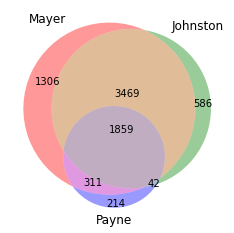

In [62]:
venn3(subsets = (set(m_tot), set(j_tot), set(payne_df['Protein ID'])), set_labels = ('Mayer', 'Johnston', 'Payne'))
#plt.savefig('data/our_overlap.png')
plt.show()

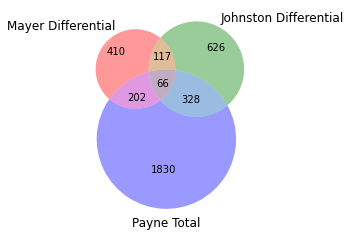

In [63]:
venn3(subsets = (set(m_diff), set(j_diff), set(payne_df['Protein ID'])), set_labels = ('Mayer Differential', 'Johnston Differential', 'Payne Total'))
#plt.savefig('data/differential_overlap_payne.png')
plt.show()

### Scratch tests

Now I am checking Mayer

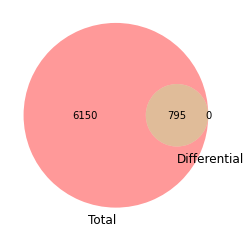

In [64]:
venn2(subsets = (set(m_tot), set(m_diff)), set_labels = ('Total', 'Differential'))
plt.show()

And Johnston

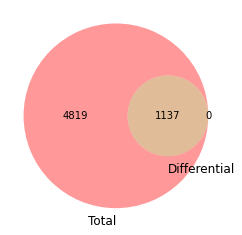

In [65]:
venn2(subsets = (set(j_tot), set(j_diff)), set_labels = ('Total', 'Differential'))
plt.show()

In [66]:
j_p = j_df[['Protein group accession', "-Log10(p value)"]]
j_p.set_index('Protein group accession')

,-Log10(p value)
Protein group accession,
Q07065,7.749376
Q9NQY0,7.778704
P01833,4.903921
Q6K0P9,6.030706
O94921,7.838829
...,...
Q16799,5.895298
A2RUS2,8.119950
Q12797,7.515437


In [67]:
len(m_and_j)

5328

In [68]:
#mayer_all = pd.concat([m_ne_df, m_cyt_df])
#mayer_p_1 = m_cyt_df[['Protein IDs', "Student's t-test p-value CLL vs  elderly B cells"]] #ADDED
mayer_p = m_ne_df[['Protein IDs', "Student's t-test p-value CLL vs  elderly B cells"]]
#mayer_p = pd.concat([mayer_p_1, mayer_p])
#mayer_p = mayer_p.drop_duplicates()
mayer_p.set_index('Protein IDs')

,Student's t-test p-value CLL vs elderly B cells
Protein IDs,
A0AV96,0.174310
A0AVT1,0.353243
A0FGR8,0.047417
A0JLT2,0.217343
A0JNW5,0.566918
...,...
Q9Y6X5,0.964055
Q9Y6X8;Q9H4I2,0.767589
Q9Y6X9,0.929746


In [69]:
mj_intersection = set(mayer_p['Protein IDs']).intersection(set(j_p['Protein group accession']))
#mj_intersection = set(j_p.index).intersection(set(mayer_p.index))

In [70]:
len(mj_intersection)

4901

In [71]:
#This may be because of the combination thing 
#    - p1;p2 vs p2;p3 won't count p2, 
#    but we can deal with that later if it's important enough

In [72]:
from numpy import log10

df_mj_pvals = pd.DataFrame(index = list(mj_intersection), columns = 
                           ['Mayer et al. -log10(p)', 'Johnston et al. -log10(p)'])
#df_mj_pvals['Mayer et al. -log10(p)'] = mayer_p["Student's t-test p-value CLL vs elderly B cells"]
#df_mj_pvals['Johnston et al. -log10(p)'] = j_p["-Log10(p value)"]

In [73]:
for i in mj_intersection:
    val = float(mayer_p[mayer_p['Protein IDs']==i]["Student's t-test p-value CLL vs  elderly B cells"])
    df_mj_pvals.loc[i, 'Mayer et al. -log10(p)'] = -log10(val)#since this is p and the other is -log(p)
    
    valj = float(j_p[j_p['Protein group accession']==i]["-Log10(p value)"])
    df_mj_pvals.loc[i,'Johnston et al. -log10(p)'] = valj

In [74]:
df_mj_pvals

,Mayer et al. -log10(p),Johnston et al. -log10(p)
O75822,0.40686,0.379509
O75694,1.46231,0.0987058
Q15057,0.891641,0.395793
Q9Y4K1,0.00369896,1.01266
O15020,1.39068,2.8419
...,...,...
Q9NVE7,0.0414256,1.97487
Q96G25,1.85692,4.77161
Q9UBF6,0.149896,0.759783
P14316,0.775048,3.62803


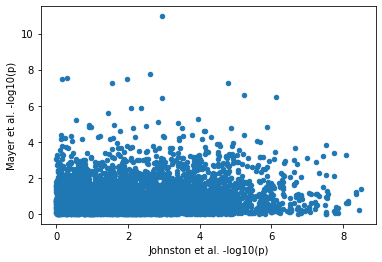

In [75]:
df_mj_pvals.plot.scatter('Johnston et al. -log10(p)', 'Mayer et al. -log10(p)')
#plt.savefig('data/mj_all_pvalues.png')
plt.show()

In [76]:
from scipy import stats
stats.pearsonr(df_mj_pvals['Johnston et al. -log10(p)'], df_mj_pvals['Mayer et al. -log10(p)'])

(0.12109418565881712, 1.7908453923741436e-17)

In [77]:
sig_both = mj_intersection.intersection(set(m_diff),set(j_diff)) 

In [78]:
significant_in_either = mj_intersection.intersection(set(m_diff)).union(
    mj_intersection.intersection(set(j_diff)))

In [79]:
significant_in_either

{'O15020',
 'P06280',
 'P48728',
 'Q9HAS0',
 'Q6NTE8',
 'Q9UHB6',
 'Q96PK6',
 'O75947',
 'Q14CX7',
 'O43175',
 'P58546',
 'P52565',
 'Q16204',
 'O95336',
 'Q15427',
 'Q9BPW8',
 'P28288',
 'P23246',
 'P48506',
 'P52756',
 'P23443',
 'O94925',
 'Q96EH3',
 'Q9P2A4',
 'Q00325',
 'P34932',
 'P51991',
 'Q9UEU0',
 'Q86VP1',
 'Q12882',
 'Q9BW85',
 'O14949',
 'P14151',
 'Q9C0J8',
 'Q9NQG5',
 'P62495',
 'P53814',
 'Q96DF8',
 'P49795',
 'Q08257',
 'P11310',
 'Q9NP61',
 'Q96KP1',
 'O43598',
 'P52306',
 'P09234',
 'Q5SSJ5',
 'Q9UIB8',
 'Q9ULM3',
 'Q16630',
 'P04040',
 'Q9NUP1',
 'Q9NXW9',
 'P45973',
 'P07602',
 'O00291',
 'Q8N103',
 'Q9UDT6',
 'Q7Z7F0',
 'Q9Y4X4',
 'O43516',
 'Q9ULC5',
 'Q14966',
 'Q9C0H2',
 'O95644',
 'O60381',
 'Q8N5K1',
 'Q86TU7',
 'Q07065',
 'Q13188',
 'Q15054',
 'Q6NVY1',
 'O60568',
 'Q02750',
 'Q9NRV9',
 'Q6PCB8',
 'Q6XQN6',
 'P29372',
 'P15498',
 'P40926',
 'P11137',
 'Q9Y4C1',
 'P08603',
 'Q8WXH0',
 'Q9NUY8',
 'Q92608',
 'Q8NDH3',
 'Q8N0X4',
 'Q96LA5',
 'O94886',
 'Q96T66',

In [80]:
df_mj_pvals_sig_in_either = pd.DataFrame(index = list(significant_in_either), columns = 
                           ['Mayer et al. -log10(p)', 'Johnston et al. -log10(p)'])

for i in significant_in_either:
    val = float(mayer_p[mayer_p['Protein IDs']==i]["Student's t-test p-value CLL vs  elderly B cells"])
    df_mj_pvals_sig_in_either.loc[i, 'Mayer et al. -log10(p)'] = -log10(val)#since this is p and the other is -log(p)
    
    valj = float(j_p[j_p['Protein group accession']==i]["-Log10(p value)"])
    df_mj_pvals_sig_in_either.loc[i,'Johnston et al. -log10(p)'] = valj

In [81]:
df_mj_pvals_sig_in_either

,Mayer et al. -log10(p),Johnston et al. -log10(p)
O15020,1.39068,2.8419
P06280,1.32271,2.91338
P48728,1.94982,0.795212
Q9HAS0,2.26477,1.09555
Q6NTE8,3.02954,3.9146
...,...,...
Q15389,0.407912,6.72623
P35637,2.51239,4.05124
P00352,0.047148,4.68238
P25942,0.350619,2.92523


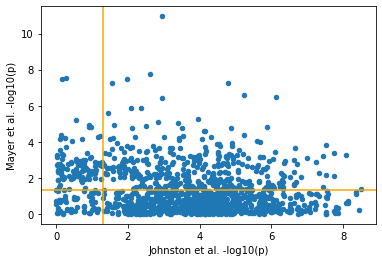

In [84]:
df_mj_pvals_sig_in_either.plot.scatter('Johnston et al. -log10(p)', 'Mayer et al. -log10(p)')
plt.axhline(-log10(.05), color ='orange')
plt.axvline(-log10(.05), color ='orange')
plt.savefig('data/mj_sig-in-both_pvalues.png')

In [83]:
stats.pearsonr(df_mj_pvals_sig_in_either['Johnston et al. -log10(p)'], df_mj_pvals_sig_in_either['Mayer et al. -log10(p)'])

(-0.20182919582138806, 7.443974290859802e-13)